In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [3]:
df = pd.read_csv(r"weights_heights.csv")

<h3>Задание 1. Первичный анализ данных c Pandas</h3>

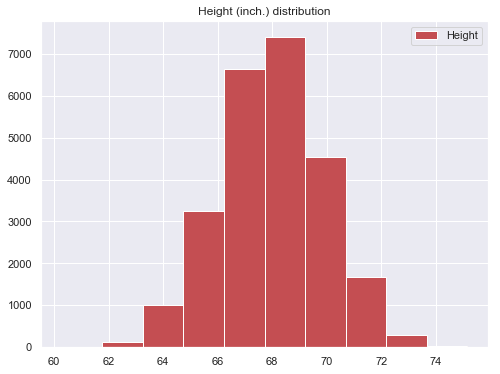

In [13]:
plt.figure(figsize=(8,6))
df["Height"].hist(color="r", label="Height")
plt.title('Height (inch.) distribution')
plt.legend(loc="best")
plt.show()

Посмотрите на первые 5 записей с помощью метода head Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода plot Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку

In [14]:
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


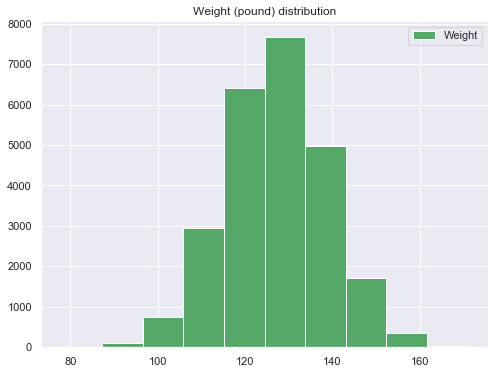

In [17]:
plt.figure(figsize=(8,6))
df["Weight"].hist(color="g", label="Weight")
plt.title("Weight (pound) distribution")
plt.legend(loc="best")
plt.show()

In [18]:
def bmi(h,w):
    meter_to_inch, kilo_to_pound = 39.37, 2.20462
    bmi = (w/kilo_to_pound)/((h/meter_to_inch)**2)
    return bmi

In [19]:
df["BMI"] = df.apply(lambda row: bmi(row["Height"], row["Weight"]), axis=1)

<Figure size 576x432 with 0 Axes>

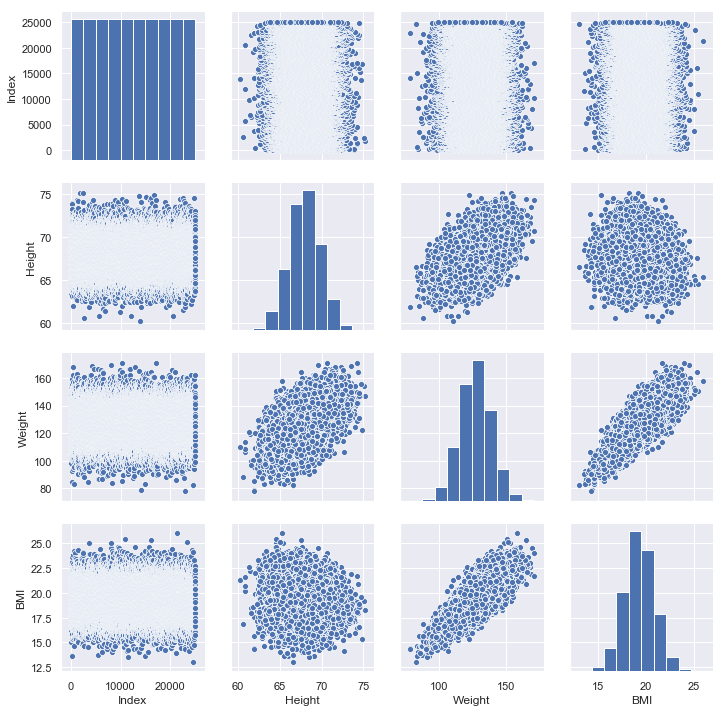

In [20]:
plt.figure(figsize=(8,6))
sns.pairplot(df)
plt.show()

In [22]:
df["weight_cat"] = df["Weight"].apply(lambda x: 1 if x < 120 else(3 if x >= 150 else 2))

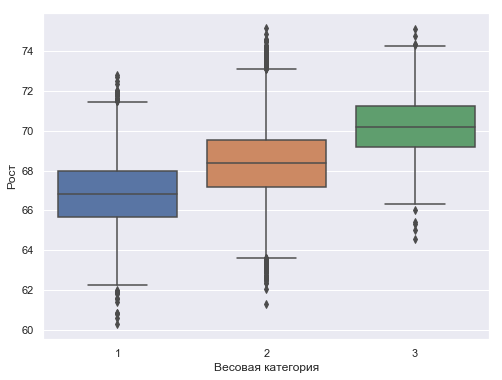

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x = "weight_cat", y = "Height", data = df)
plt.xlabel("Весовая категория")
plt.ylabel("Рост")
plt.show()

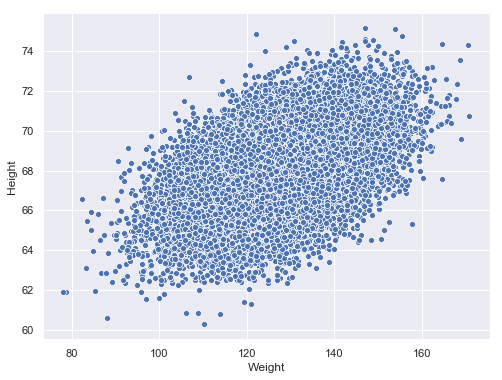

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Weight", y="Height", data = df)
plt.show()

<h3>Задание 2. Минимизация квадратичной ошибки</h3>

In [123]:
def sq_error(w0, w1):
    return np.sum((df['Height']-(w0+w1*df['Weight']))**2)

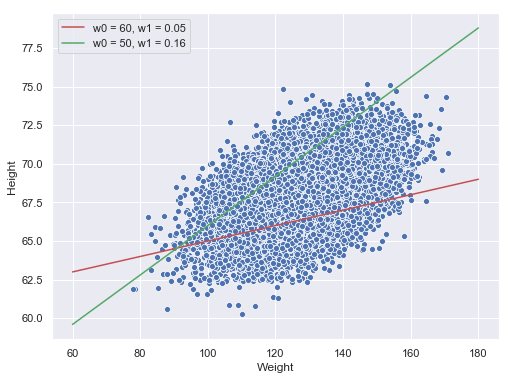

In [54]:
# первая линия
w0, w1 = 60, 0.05
x = np.linspace(60,180)
y1 = w0 + w1*x

# вторая линия
w0, w1 = 50, 0.16
y2 = w0 + w1*x

# отобразим линии + распределение точек
plt.figure(figsize=(8,6))
sns.scatterplot(x='Weight', y='Height', data = df)

plt.plot(x, y1, label = "w0 = 60, w1 = 0.05", color = "r")
plt.plot(x, y2, label = "w0 = 50, w1 = 0.16", color = "g")

plt.xlabel("Weight")
plt.ylabel("Height")

plt.legend(loc = "best")

plt.show()

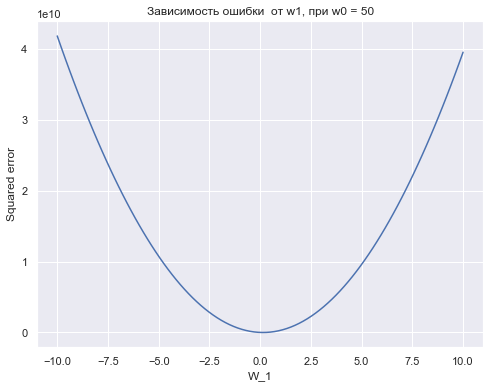

In [83]:
w1 = np.linspace(-10,10,100)
error_array = [sq_error(w0=50, w1=x) for x in w1]

plt.figure(figsize=(8,6))
plt.plot(w1,error_array)
plt.title("Зависимость ошибки  от w1, при w0 = 50")
plt.xlabel("W_1")
plt.ylabel("Squared error")
plt.show()

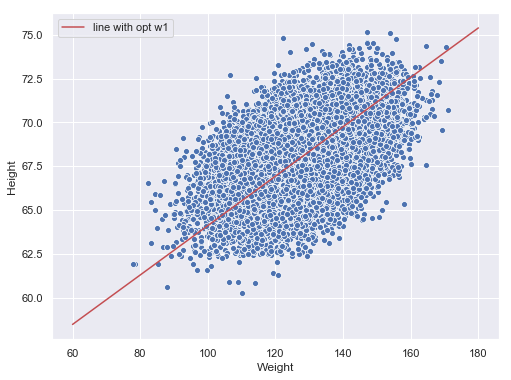

In [100]:
from scipy.optimize import minimize_scalar

minimize = minimize_scalar(lambda w: squaredError(50, w), bounds=(-5, 5))
w1_opt = minimize.x
y_opt = 50 + w1_opt * x

plt.figure(figsize=(8,6))
sns.scatterplot(x='Weight', y='Height', data = df)
plt.plot(x, y_opt, color = "r", label = "line with opt w1")
plt.legend(loc = "best")
plt.show()

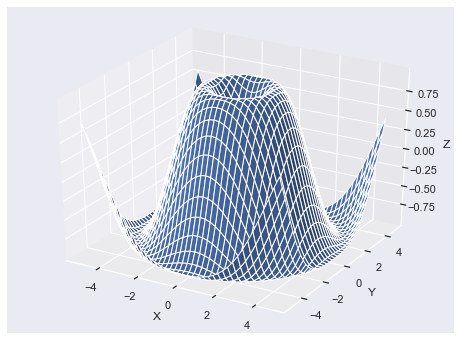

In [110]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [138]:
from scipy.optimize import minimize

error = lambda w: sq_error(w[0], w[1])
min_ = minimize(error, (0,0), bounds=[(-100,100), (-5,5)], method="L-BFGS-B")

w0 = min_.x[0]
w1 = min_.x[1]

print("Optimal W_0 - {}".format(w0))
print("Optimal w_1 - {}".format(w1))

Optimal W_0 - 57.571791617732416
Optimal w_1 - 0.08200636996585035


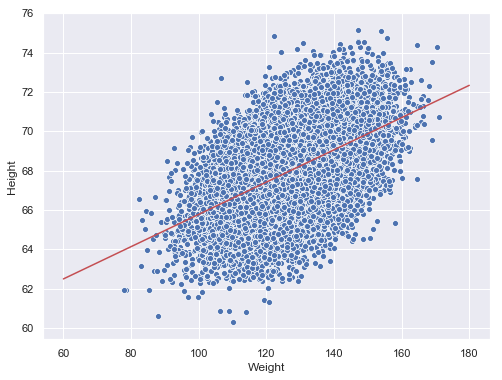

In [140]:
plt.figure(figsize=(8,6))

y_4 = w0 + w1*x

plt.plot(x, y_4, color="r")
sns.scatterplot(x='Weight', y='Height', data = df)
plt.show()